# PHREEQC Bacteria Model Plotting
This notebook will plot your PHREEQC results along with your data. The model has already been copied to this folder from week 7 and renamed `bact_selectedoutput.sel`.

## Start this notebook by specifying the data you would like to plot.
* Replace `df_example.csv` with the filename of your adsorption data

In [7]:
# Data filename
data_set = 'df_example.csv'

## Model and data import

In [8]:
# import the pandas module to store data in a dataframe
import pandas as pd
# Model filename already specified
model_selected_output = 'bact_selectedoutput.sel'
# Load the data set
df1 = pd.read_csv(data_set)
# This will automatically remove data that is below pH 4.5 or above pH9.5
df2 = df1[(df1['pH'] >= 4.5) & (df1['pH'] <= 9.5)][['pH', 'sampconc']]
# This will sort the data in ascending order based on pH
df2.sort_values("pH", inplace=True)
# This will calculate Zn adsorption as a percentage of the total Zn concentration
df2['Znadsper'] = (1 - (df2['sampconc'] / 5)) * 100
# This will replace negative values of Znadsper with 0
df2['Znadsper'] = df2['Znadsper'].clip(lower=0)
# This will replace Znadsper values greater than 100 with 100
df2['Znadsper'] = df2['Znadsper'].clip(upper=100)

# load the selected output into a dataframe and specify that the data are separated by tabs
mod = pd.read_csv(model_selected_output, sep="\t")
# get rid of the first row data (see comment above about why)
mod.drop([0], inplace=True)
mod.drop([1], inplace=True)
# get rid of extraneous whitespaces in the column headers
mod = mod.rename(columns=lambda x: x.strip())
# sort the data in acending order based on pH
mod.sort_values("pH", inplace=True)

## Double check that the selected output looks correct

In [9]:
mod

,pH,m_BactaOZn+,m_BactbOZn+,m_BactcOZn+,Unnamed: 4
2,4.5,3.582900e-06,1.117100e-06,6.548900e-07,NaN
3,5.0,3.618200e-06,1.984800e-06,1.973300e-06,NaN
4,5.5,3.454300e-06,2.538400e-06,5.589300e-06,NaN
5,6.0,3.060800e-06,2.524600e-06,1.359500e-05,NaN
6,6.5,2.476000e-06,2.124200e-06,2.525100e-05,NaN
7,7.0,1.978200e-06,1.718500e-06,3.511400e-05,NaN
8,7.5,1.695800e-06,1.479000e-06,3.984800e-05,NaN
9,8.0,1.506600e-06,1.315400e-06,3.990900e-05,NaN
10,8.5,1.141700e-06,9.969000e-07,3.274700e-05,NaN
11,9.0,4.471500e-07,3.902400e-07,1.425800e-05,NaN


## Double check that the data looks correct

In [10]:
df1

,sample_name,pH,sampabs,tot_zn_ppm,sampconc,Znads,Znadsper
0,NaN,7.177,0.0820,5.0,1.252098,3.747902,74.958049
1,NaN,7.620,0.0550,NaN,0.810730,4.189270,83.785392
2,NaN,6.930,0.0370,NaN,0.516486,4.483514,89.670288
3,NaN,8.010,0.0340,NaN,0.467445,4.532555,90.651104
4,NaN,7.160,0.0090,NaN,0.058772,4.941228,98.824569
5,NaN,7.200,0.0700,NaN,1.055934,3.944066,78.881313
6,NaN,7.330,0.0010,NaN,0.091245,4.908755,98.175095
7,NaN,7.100,0.0003,NaN,0.077854,4.922146,98.442921
8,NaN,9.660,-0.0010,NaN,0.052984,4.947016,98.940311
9,NaN,7.500,-0.0158,NaN,0.000000,NaN,100.000000


### We need to sum Zn adsorbed onto each surface site at each pH value in order to calculate total Zn adsorbed.

In [11]:
# Convert the total Zn used in the experiments from ppm to molality
znm = df1["tot_zn_ppm"][0] / 65380
# sum the Zn adsorbed on the strong and weak surface sites at each pH value
modznads = mod["m_BactaOZn+"] + mod["m_BactbOZn+"] + mod["m_BactcOZn+"]
# calculate total zn adsorbed as a percent
modsper = (modznads / znm) * 100
# calcuate Zn adsorbed on the strong and weak site as percents
sitea = mod["m_BactaOZn+"] / znm * 100
siteb = mod["m_BactbOZn+"] / znm * 100
sitec = mod["m_BactcOZn+"] / znm * 100


### Now we can plot the experimental data and model result on the same plot. We can also add the predicted speciation of the Zn surface species.

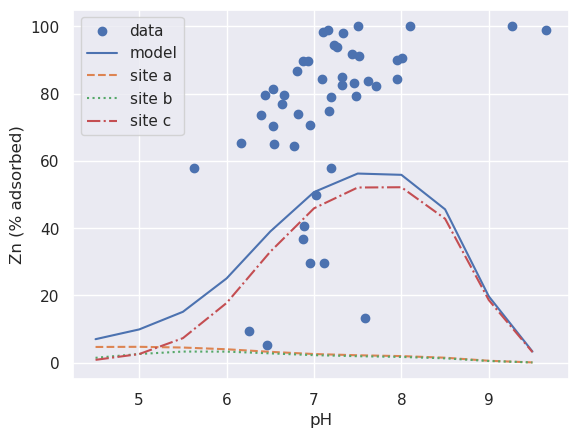

In [12]:
# I'll need to import a some modules for the plotting and downloading the plot.
import matplotlib.pyplot as plt

# to make the plots look nicer we will import the seaborn module
import seaborn as sns

sns.set_theme()

plt.figure()
# I'll plot the data as points and the model as a line
plt.scatter(df1["pH"], df1["Znadsper"], label="data")
plt.plot(mod["pH"], modsper, label="model")
plt.plot(mod["pH"], sitea, label="site a", linestyle="--")
plt.plot(mod["pH"], siteb, label="site b", linestyle=":")
plt.plot(mod["pH"], sitec, label="site c", linestyle="-.")
# Label the x and y axes
plt.xlabel("pH")
plt.ylabel("Zn (% adsorbed)")

# Add a legend to the plot
plt.legend()

# Save and download the plot as pdf and png file
plt.savefig("zn_bact_mod.pdf")